# Quantitative comparisons and statistical visualizations

In [25]:
import pandas as pd
medals = pd.read_csv("C:\\Users\\yazan\\Desktop\\DS\\5-Introduction to Data Visualization with Matplotlib\\Datasets\\medals_by_country_2016.csv", index_col=0)
print(medals.head())

summer2016 = pd.read_csv('C:\\Users\\yazan\\Desktop\\DS\\5-Introduction to Data Visualization with Matplotlib\\Datasets\\summer2016.csv', index_col=0)
print(summer2016.head())
mens_rowing = summer2016[summer2016['Sport'] == 'Rowing']
mens_gymnastics = summer2016[summer2016['Sport'] == 'Gymnastics']

# The weather in Seattle and Austin
seattle_weather = pd.read_csv('C:\\Users\\yazan\\Desktop\\DS\\5-Introduction to Data Visualization with Matplotlib\\Datasets\\seattle_weather2.csv')
seattle_weather = seattle_weather.query('NAME=="SEATTLE SAND PT WSFO, WA US"')
austin_weather= pd.read_csv('C:\\Users\\yazan\\Desktop\\DS\\5-Introduction to Data Visualization with Matplotlib\\Datasets\\austin_weather.csv')

               Bronze  Gold  Silver
United States      67   137      52
Germany            67    47      43
Great Britain      26    64      55
Russia             35    50      28
China              35    44      30
      ID                         Name Sex   Age  Height  Weight        Team  \
158   62            Giovanni Abagnale   M  21.0   198.0    90.0       Italy   
161   65            Patimat Abakarova   F  21.0   165.0    49.0  Azerbaijan   
175   73                    Luc Abalo   M  31.0   182.0    86.0      France   
450  250         Saeid Morad Abdevali   M  26.0   170.0    80.0        Iran   
794  455  Denis Mikhaylovich Ablyazin   M  24.0   161.0    62.0      Russia   

     NOC        Games  Year  Season            City       Sport  \
158  ITA  2016 Summer  2016  Summer  Rio de Janeiro      Rowing   
161  AZE  2016 Summer  2016  Summer  Rio de Janeiro   Taekwondo   
175  FRA  2016 Summer  2016  Summer  Rio de Janeiro    Handball   
450  IRI  2016 Summer  2016  Summer  Rio 

# 1. Quantitative comparisons: bar-charts

<b>1.1 Bar chart</b>

Bar charts visualize data that is organized according to categories as a series of bars, where the height of each bar represents the values of the data in this category.

For example, in this exercise, you will visualize the number of gold medals won by each country in the provided medals DataFrame. The DataFrame contains the countries as the index, and a column called "Gold" that contains the number of gold medals won by each country, according to their rows.

C:\Users\yazan\AppData\Local\Temp\ipykernel_12872\3910427061.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


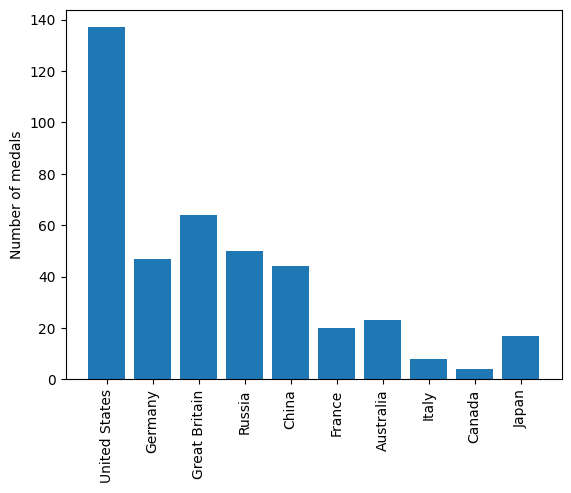

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()

<b>1.2 Stacked bar chart</b>

A stacked bar chart contains bars, where the height of each bar represents values. In addition, stacked on top of the first variable may be another variable. The additional height of this bar represents the value of this variable. And you can add more bars on top of that.

In this exercise, you will have access to a DataFrame called medals that contains an index that holds the names of different countries, and three columns: "Gold", "Silver" and "Bronze". You will also have a Figure, fig, and Axes, ax, that you can add data to.

You will create a stacked bar chart that shows the number of gold, silver, and bronze medals won by each country, and you will add labels and create a legend that indicates which bars represent which medals.

C:\Users\yazan\AppData\Local\Temp\ipykernel_12872\1073561064.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


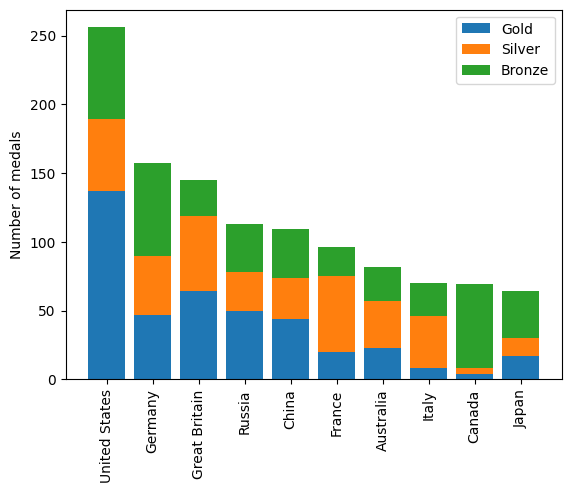

In [27]:
fig, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label='Gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom= medals['Gold'],label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom=medals['Silver'] + medals['Gold'], label='Bronze')

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

# Display the legend
ax.legend()

plt.show()

# 2. Quantitative comparisons: histograms


<b>2.1 Creating histograms</b>

Histograms show the full distribution of a variable. In this exercise, we will display the distribution of weights of medalists in gymnastics and in rowing in the 2016 Olympic games for a comparison between them.

You will have two DataFrames to use. The first is called mens_rowing and includes information about the medalists in the men's rowing events. The other is called mens_gymnastics and includes information about medalists in all of the Gymnastics events.

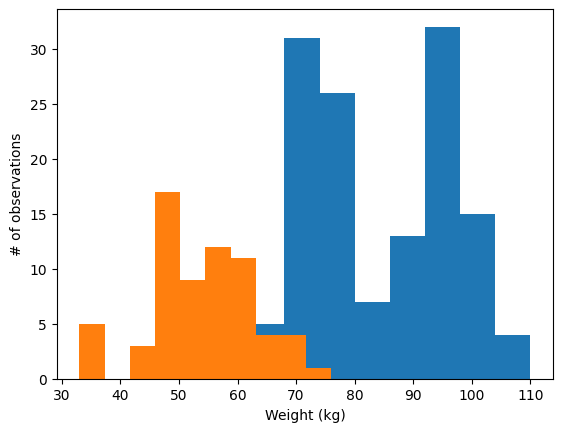

In [28]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

<b>2.2 "Step" histogram</b>

Histograms allow us to see the distributions of the data in different groups in our data. In this exercise, you will select groups from the Summer 2016 Olympic Games medalist dataset to compare the height of medalist athletes in two different sports.

The data is stored in a pandas DataFrame object called summer_2016_medals that has a column "Height". In addition, you are provided a pandas GroupBy object that has been grouped by the sport.

In this exercise, you will visualize and label the histograms of two sports: "Gymnastics" and "Rowing" and see the marked difference between medalists in these two sports.

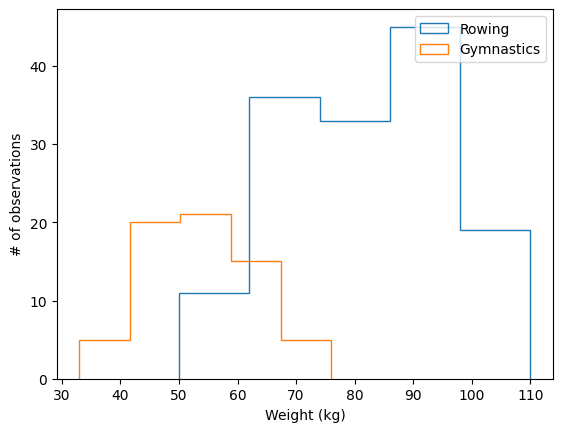

In [29]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], histtype='step', label='Rowing', bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], histtype='step', label='Gymnastics', bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

# 3. Statistical plotting

<b>3.1 Adding error-bars to a bar chart</b>

Statistical plotting techniques add quantitative information for comparisons into the visualization. For example, in this exercise, we will add error bars that quantify not only the difference in the means of the height of medalists in the 2016 Olympic Games, but also the standard deviation of each of these groups, as a way to assess whether the difference is substantial relative to the variability within each group.

For the purpose of this exercise, you will have two DataFrames: mens_rowing holds data about the medalists in the rowing events and mens_gymnastics will hold information about the medalists in the gymnastics events.

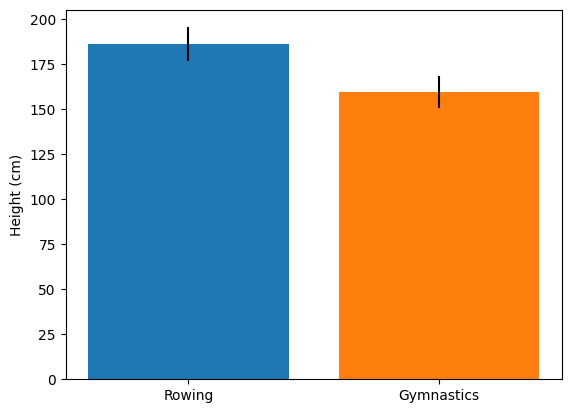

In [30]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

These error bars can help you see that the difference in heights is rather large in terms of the standard deviation within every group.

<b>3.2 Adding error-bars to a plot</b>

Adding error-bars to a plot is done by using the errorbar method of the Axes object.

Here, you have two DataFrames loaded: seattle_weather has data about the weather in Seattle and austin_weather has data about the weather in Austin. Each DataFrame has a column "MONTH" that has the names of the months, a column "MLY-TAVG-NORMAL" that has the average temperature in each month and a column "MLY-TAVG-STDDEV" that has the standard deviation of the temperatures across years.

In the exercise, you will plot the mean temperature across months and add the standard deviation at each point as y errorbars.

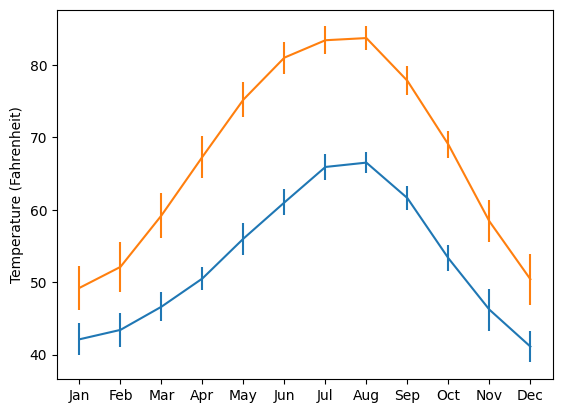

In [31]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"], yerr=seattle_weather["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], yerr=austin_weather["MLY-TAVG-STDDEV"])

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

<b>3.3 Creating boxplots</b>

Boxplots provide additional information about the distribution of the data that they represent. They tell us what the median of the distribution is, what the inter-quartile range is and also what the expected range of approximately 99% of the data should be. Outliers beyond this range are particularly highlighted.

In this exercise, you will use the data about medalist heights that you previously visualized as histograms, and as bar charts with error bars, and you will visualize it as boxplots.

Again, you will have the mens_rowing and mens_gymnastics DataFrames available to you, and both of these DataFrames have columns called "Height" that you will compare.

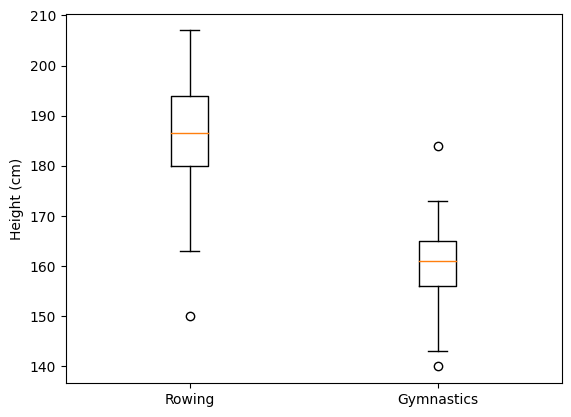

In [32]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing","Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()